# <a id='toc1_'></a>[Rozdział 9. Równania różniczkowe zwyczajne](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 9. Równania różniczkowe zwyczajne](#toc1_)    
  - [Symboliczne rozwiązywanie równań z użyciem SymPy](#toc1_1_)    
    - [Prawo stygnięcia Newtona](#toc1_1_1_)    
    - [Tłumiony oscylator harmoniczny](#toc1_1_2_)    
  - [Pola kierunków](#toc1_2_)    
  - [Numeryczne rozwiązywanie równań z użyciem SciPy](#toc1_3_)    
    - [Równania Lotki-Volterry dla popolacji drapieżnik/ofiara](#toc1_3_1_)    
    - [Lorenz equations](#toc1_3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)

In [85]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import sympy
sympy.init_printing(pretty_print=True)

from scipy import integrate

## <a id='toc1_1_'></a>[Symboliczne rozwiązywanie równań z użyciem SymPy](#toc0_)

### <a id='toc1_1_1_'></a>[Prawo stygnięcia Newtona](#toc0_)

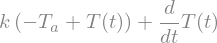

In [86]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

ode = T(t).diff(t) + k*(T(t) - Ta)
ode

In [87]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [88]:
ode_sol.lhs, ode_sol.rhs

In [89]:
ics = {T(0): T0}
C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

In [93]:
C_sol = sympy.solve(C_eq)
C_sol

In [85]:
ode_sol.subs(C_sol[0])

### <a id='toc1_1_2_'></a>[Tłumiony oscylator harmoniczny](#toc0_)

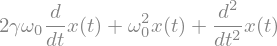

In [94]:
t, omega0 = sympy.symbols("t, omega_0", positive=True)
gamma = sympy.symbols("gamma", complex=True)

x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
ode

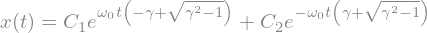

In [95]:
ode_sol = sympy.dsolve(ode)
ode_sol

## <a id='toc1_2_'></a>[Pola kierunków](#toc0_)

In [96]:
# Plot the direction field for a first order ODE y' = f(y, x)
def  plot_direction_field(x, y, f, ax):
    dx = np.abs(x[0] - x[1])
    dy = np.abs(y[0] - y[1])
    r = np.sqrt(dx**2 + dy**2)

    for xi in x:
        for yi in y:
            fi = f(yi, xi)
            P = np.array([xi, yi])
            v = np.array([1, fi]) * ( 0.5 * r / np.sqrt(1 + fi**2) )
            P1 = P + 0.5 * v
            P2 = P - 0.5 * v
            ax.plot([P1[0], P2[0]], [P1[1], P2[1]], 'b', lw=0.5)

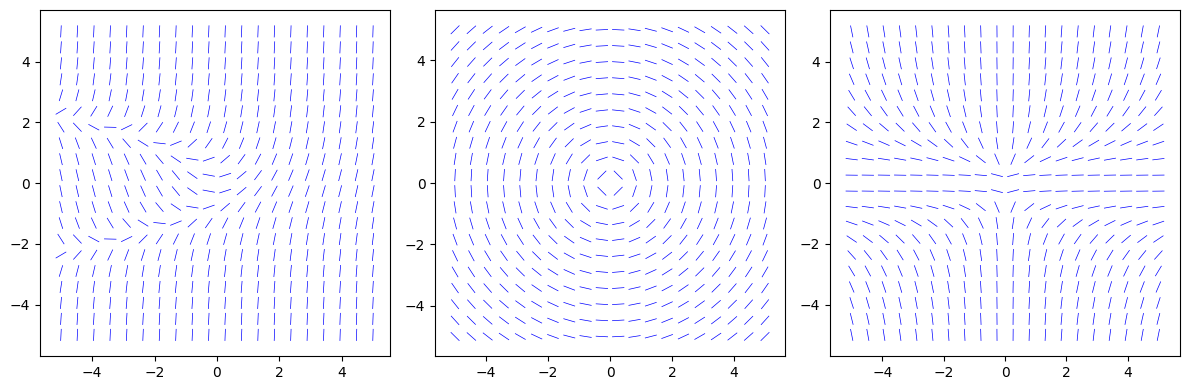

In [97]:
f1 = lambda y, x: y**2 + x
f2 = lambda y, x: -x / y
f3 = lambda y, x: y**2 / x

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y, f1, ax=axes[0])
plot_direction_field(x, y, f2, ax=axes[1])
plot_direction_field(x, y, f3, ax=axes[2])

fig.tight_layout()

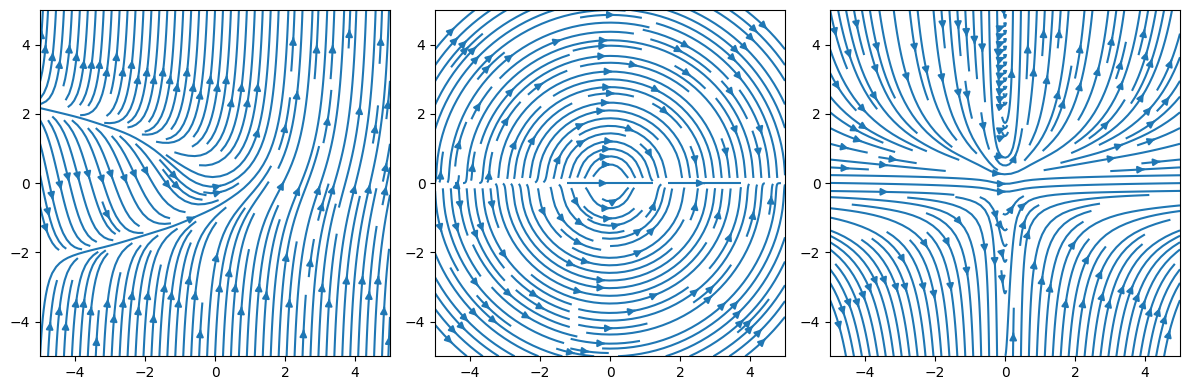

In [106]:
f1 = lambda y, x: y**2 + x
f2 = lambda y, x: -x / y
f3 = lambda y, x: y**2 / x

X, Y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].streamplot(X, Y, np.ones_like(X), f1(Y,X), density=1.5) 
axes[1].streamplot(X, Y, np.ones_like(X), f2(Y,X), density=1.5) 
axes[2].streamplot(X, Y, np.ones_like(X), f3(Y,X), density=1.5) 

fig.tight_layout()

## <a id='toc1_3_'></a>[Numeryczne rozwiązywanie równań z użyciem SciPy](#toc0_)

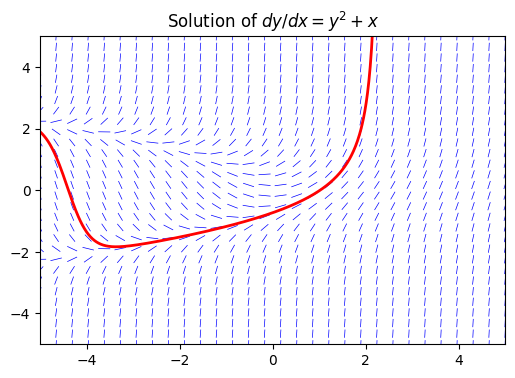

In [64]:
# dY/dt = f(Y, t)
f = lambda y, x: y**2 + x

y0 = [1.9]  # initial condition
x = np.linspace(-5, 2.2, 500)  # x values
y_sol = integrate.odeint(f, y0, x)  # solve the ODE

# Plot the solution
fig, ax = plt.subplots(figsize=(6, 4))
plot_direction_field(np.linspace(-5,5,30), np.linspace(-5,5,30), f, ax=ax)
ax.plot(x, y_sol, 'r', lw=2)
ax.set_title('Solution of $dy/dx = y^2 + x$')
ax.set_ylim([-5, 5])
ax.set_xlim([-5, 5]);


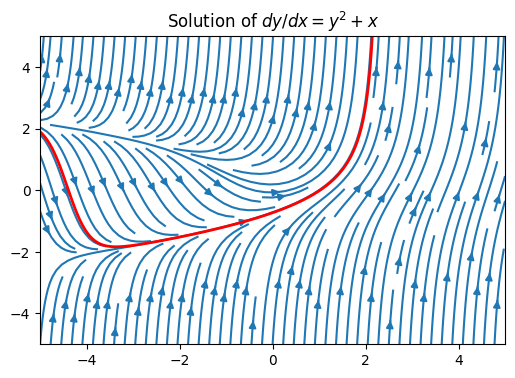

In [107]:
# dY/dt = f(Y, t)
f = lambda y, x: y**2 + x

y0 = [1.9]  # initial condition
x = np.linspace(-5, 2.2, 500)  # x values
y_sol = integrate.odeint(f, y0, x)  # solve the ODE

# Plot the solution
X, Y = np.meshgrid(np.linspace(-5,5,30), np.linspace(-5,5,30))
fig, ax = plt.subplots(figsize=(6, 4))
ax.streamplot(X, Y, np.ones_like(X), f(Y, X), density=1.5)
ax.plot(x, y_sol, 'r', lw=2)
ax.set_title('Solution of $dy/dx = y^2 + x$')
ax.set_ylim([-5, 5])
ax.set_xlim([-5, 5]);

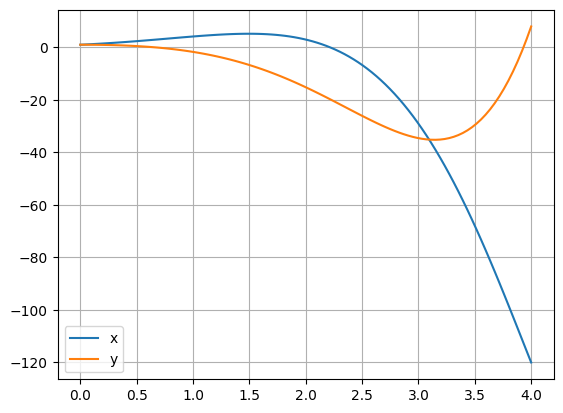

In [108]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# dY/dt = f(Y, t)
def ode_func(Y, t):
  x, y = Y
  dYdt = [t + (x + y), (y - x) - t]
  return dYdt

# Initial conditions
Y0 = [1, 1]

# Time points
t = np.linspace(0, 4, 100)

# Solve the ODE
sol = odeint(ode_func, Y0, t)

# Extract the solution for x and y
x = sol[:, 0]
y = sol[:, 1]

# Plot the solution
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.grid(True)
plt.legend();


### <a id='toc1_3_1_'></a>[Równania Lotki-Volterry dla popolacji drapieżnik/ofiara](#toc0_)

$$
x'(t) = a x - b x y
$$

$$
y'(t) = c x y - d y
$$

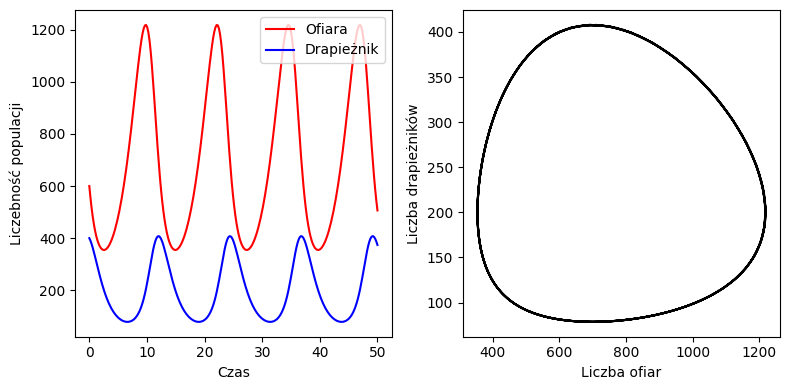

In [66]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# dY/dt = f(Y, t)
# Define the parameters and function for the predator-prey model
a, b, c, d = 0.4, 0.002, 0.001, 0.7

def f(Y, t):
  x, y = Y
  return [a * x - b * x * y,
      c * x * y - d * y]

# Set the initial conditions
Y0 = [600, 400]

# Define the time interval
t = np.linspace(0, 50, 250)

# Solve the ODEs using the integrate.odeint function
xy_t = integrate.odeint(f, Y0, t)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the population dynamics of the prey and predator over time
axes[0].plot(t, xy_t[:,0], 'r', label="Ofiara")
axes[0].plot(t, xy_t[:,1], 'b', label="Drapieżnik")
axes[0].set_xlabel("Czas")
axes[0].set_ylabel("Liczebność populacji")
axes[0].legend(loc=1)

# Plot the phase space of the prey and predator
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Liczba ofiar")
axes[1].set_ylabel("Liczba drapieżników")

# Adjust the layout of the subplots
fig.tight_layout()


### <a id='toc1_3_2_'></a>[Lorenz equations](#toc0_)

$$
x'(t) = \sigma(y - x)
$$
$$
y'(t) = x(\rho - z) - y 
$$
$$
z'(t) = x y - \beta z
$$

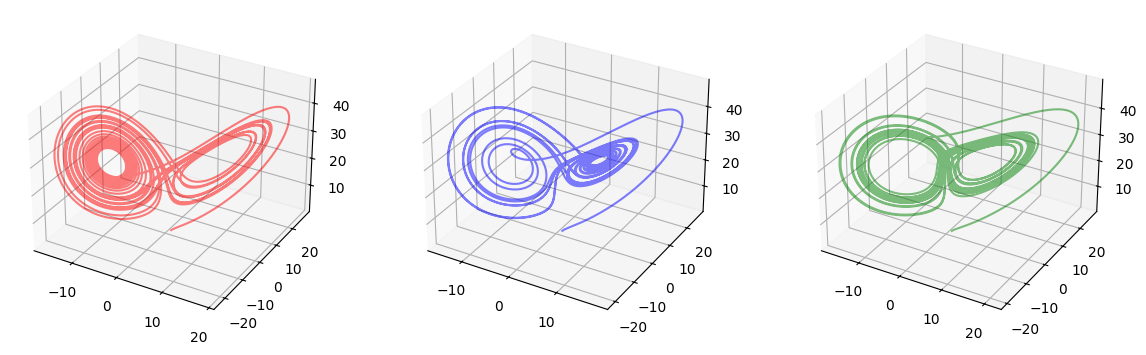

In [109]:

# Define the function for the system of ODEs
def f(Y, t, rho, sigma, beta):
    x, y, z = Y
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

# Set the parameters
rho = 28
sigma = 8
beta = 8/3.0

# Set the time points
t = np.linspace(0, 25, 10000)

# Set the initial conditions
Y0 = [1.0, 1.0, 1.0]

# Solve the ODEs for different parameter values
Y1 = integrate.odeint(f, Y0, t, args=(rho, sigma, beta))
Y2 = integrate.odeint(f, Y0, t, args=(rho, sigma, 0.6*beta))
Y3 = integrate.odeint(f, Y0, t, args=(rho, 2*sigma, 0.6*beta))

# Create a 3D plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

# Plot the trajectories for different parameter values
for ax, Y, c in [(ax1, Y1, 'r'), (ax2, Y2, 'b'), (ax3, Y3, 'g')]:
    ax.plot(Y[:,0], Y[:,1], Y[:,2], c, alpha=0.5)

fig.tight_layout()
